<a href="https://colab.research.google.com/github/maronem/PyTorch/blob/main/01_pytorch_workflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Book version of notebook: https://www.learnpytorch.io/01_pytorch_workflow/

In [28]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to the data (training)",
                      4: "making predictions and evaluate a model (inference)",
                      5: "save and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data (training)',
 4: 'making predictions and evaluate a model (inference)',
 5: 'save and loading a model',
 6: 'putting it all together'}

In [29]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'1.13.1+cu116'

## 1. Data (preparing and loading)

Machine learning is a game of two parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

Lets create some *known* data using the linear regression formula 

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [30]:
# Create *known* parameters

weight = 0.7 
bias = 0.3

# Create some data

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step=step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Text(0.5, 1.0, 'Linear Regression Data')

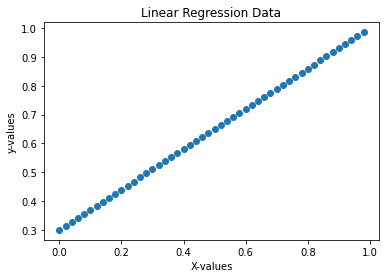

In [31]:
plt.scatter(X,y)
plt.ylabel("y-values")
plt.xlabel("X-values")
plt.title("Linear Regression Data")

In [32]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in ML)

Let's create training and test set with our data

In [33]:
# Create a train/test split

train_split = int(0.8 * len(X)) #80% train data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

"Visualize, visualize, visualize"

In [34]:
# Visualize X_train, y_train

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data, and compares predictions
  """

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plot test data in red
  plt.scatter(test_data, test_labels, c="g",s=4, label="Testing Data")

  # Are there predictions?
  if predictions is not None:
    # Plot predictions in green (if they exist)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 10});

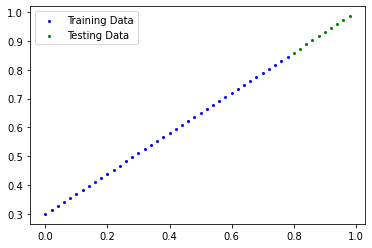

In [35]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

Linear regression model: Y = m * X + b

We will be building classes throughout the course, get familiar with OOP in Python: 

https://realpython.com/python3-object-oriented-programming/


ex) `class Dog: -(Class) - each Dog within the class is an Object` 

    species = "Canis familiaris" -(class attribute)
    def __init__(self, name, age): 
        self.name = name -(instance attribute)
        self.age = age` -(instance attribute)

* .__init__() sets the initial state of the object by assigning the values of the object’s properties
* You can give .__init__() any number of parameters, but the first parameter will always be a variable called self
* Attributes created in .__init__() are called **instance attributes** - all Dog objects will have name & age but values for *name* and *age* will vary depending on the Dog instance

**What our model does:**
* Star with random values (weight & bias)
* Look at training data and adjust random values to better represent (or get closer to) the ideal values (weight & bias we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent:
  * an iterative first-order optimisation algorithm used to find a local min/max of a given function to minimise a cost/loss function 
2. Backpropagation:
  * backpropagation computes the gradient of the loss function with respect to the weights of the network for a single input–output example

In [36]:
from torch import nn

# Create linear regression model
class LinearRegressionModel(nn.Module): #almost everything in PyTorch inherets from nn.module subclass
  def __init__(self):
    super().__init__()

    # Initialize the model parameters to be used in compuations
    self.weights = nn.Parameter(torch.randn(1, #nn.Parameter stores tensors that can be used with nn.Module
                                            requires_grad=True, #used for updating model parameters via gradient descent
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
    
  # forward() defines the compuation in the model and is required when calling nn.Module subclass
  # this defines the compuation that takes place on the data passed to the particular nn.Module
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data 
    return self.weights * x + self.bias #this is the linear regression formula

### PyTorch model building essentials

* `torch.nn` - contains all of the building blocks for computational graphs (neural network can be considered a computational graph)
* `torch.nn.Parameter` - what paramaters should our model try and learn (often a PyTorch layer from torch.nn will set these for us)
* `torch.nn.Module` - base class for all neural network modules; if you subclass it, you should overwrite forward()
* `torch.optim` - this is where the optimizers in PyTorch live, it will help with gradient descent and optimize the weights and biases
* `def forward()` - all nn.Module sublcasses require you to overwrite forward(), this method defines what happens in the forward computation


### Checking the content of our PyTorch model

Now we've created a model, let's see whats inside...

We can check out our model parameters or what's inside by using `.parameters()`

In [37]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of our model (this is a subclass of nn.module)
model_0 = LinearRegressionModel()
model_0

# Check model parameters - parameter values are what they are because they are random! Setting manual seed keeps them consistent every run
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

Purpose of our NN is to adjust the weights and bias parameters to be as close to our defined weight and bias as possible to best predict our data

In [38]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [39]:
# defined weight and bias
weight, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`

When we pass data through our model, it's going to run it through the `forward()` method

In [40]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [41]:
# Make predictions with model
with torch.inference_mode(): # context manager `inference_mode` disables gradient tracking - reduces computing time 
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on `inference_mode()`: here https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=UIAwRE5XeXTY-7e8P5tSZw
 * Can also use `torch.no_grad()`, but doesnt do as much as inference_mode and is preffered

In [42]:
print(list(y_test))
print(list(y_preds))

[tensor([0.8600]), tensor([0.8740]), tensor([0.8880]), tensor([0.9020]), tensor([0.9160]), tensor([0.9300]), tensor([0.9440]), tensor([0.9580]), tensor([0.9720]), tensor([0.9860])]
[tensor([0.3982]), tensor([0.4049]), tensor([0.4116]), tensor([0.4184]), tensor([0.4251]), tensor([0.4318]), tensor([0.4386]), tensor([0.4453]), tensor([0.4520]), tensor([0.4588])]


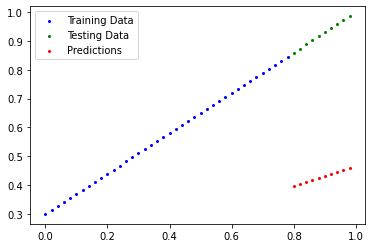

In [43]:
plot_predictions(predictions=y_preds)

## 3. Train model

The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words, from poor representation to a better representation of the data.

To measure how "poor" or "wrong" your model's predictions are is to use a **loss function**

* Note: Loss function may also be called COST FUNCTION or CRITERION, we are going to refer to it as a loss function

Things we need to train:

* **Loss function:** a function to measure how wrong your model's predictions are to the ideal outputs, lower=better 
* **Optimizer:** takes into account the **loss** of a model and adjusts the model's parameters (e.g. weight & bias) to improve the loss function.
  * Larger learning rate = larger adjustment of parameter
  * Lower learning rate = smaller adjustment of parameter

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [44]:
# Check out our model's parameters (a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [45]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
  # Learning rate value will adjust parameters to the same power
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly most important hyperparameter you can set

In [46]:
loss_fn

L1Loss()

**Q:** Which loss function should I use? 

**A:** For our case, linear regression, can use a an `L1Loss()` loss function (MAE) and an optimizer of `optim.SGD()` will suffice

But for a classification problem, you'll likely use `nn.BCELoss()` (binary cross-entropy)

### Building a training and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this invovles data moving through our model's forward() function(s)) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Opimizer zero grad
4. Loss backward - move backwards through netwrok to calculare the gradient of each of the parameters of our model with respect to the loss (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and imporve the loss (**gradient descent**)


In [47]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter bc we set it ourselves)
epochs = 200

# Track different values to be able to compare this exp to future experiments
epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data for a number of epochs
for epoch in range(epochs):
  # Set the model to training mode:
  model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass - run training data through the forward() method in our model
  y_pred = model_0(X_train)

  # 2. Calculate the loss between the predictions from training set and the ideal values
  loss = loss_fn(y_pred, y_train) # Our loss function is L1Loss() and calcs MAE

  # 3. Set optimizer to zero_grad
  optimizer.zero_grad() # resets the optimizer for backprop following each epoch, otherwise gradient will accumulate

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes the gradient will **accumulate** through the loop so... we ahve to zero them above in step 3 for the next iter of loop

  ### Testing
  model_0.eval() #turns off settings in model not needed for eval/testing (dropout/batch norm layers)
  with torch.inference_mode(): # turns off gradient tracking & other things behind the scenes to speed up computing
  #with torch.no_grad(): # you may also see torch.no_grad in older PyTorch code
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate test loss
    test_loss = loss_fn(test_pred, y_test)

  # Print whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

    # Print out model state_dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [48]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy())

array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
       0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
       0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
      dtype=float32)

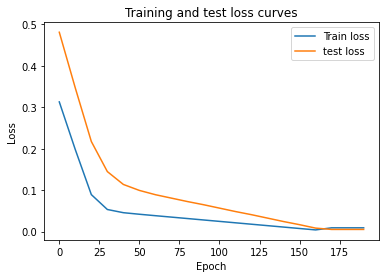

In [49]:
# Plot loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend();

In [50]:
with torch.inference_mode(): # turns off gradient tracking & other things not needed for eval/testing
  y_preds_new = model_0(X_test)

In [51]:
# initial weight/bias
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [52]:
weight, bias

(0.7, 0.3)

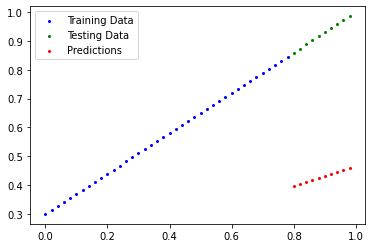

In [53]:
plot_predictions(predictions=y_preds)

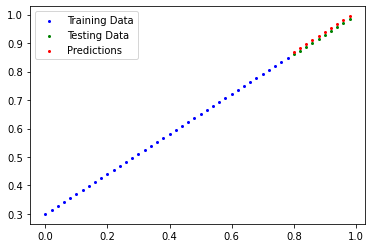

In [54]:
plot_predictions(predictions=y_preds_new) 
# this is following 200 epochs

## Saving a model in PyTorch

There are 3 main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format - https://docs.python.org/3/library/pickle.htm
2. `torch.load()` - allows you to load a saved pytorch object
3. `torch.nn.Module.load_state_dict()` - allows you to load a model's saved state dictionary

Resource for saving and loading model's in PyTorch: https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [55]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [56]:
# Optimizers also have a state_dict()
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [57]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model `state_dict()`
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_0.pth


In [58]:
!ls -1 models

01_pytorch_workflow_0.pth


## Loading a Pytorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [59]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load saved state_dict of mode_0 (wil update new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [60]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [61]:
# Make some model preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [62]:
# Make some predictions with our loaded model 
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [63]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Lets go back through the steps above and see it all in one place



In [64]:
# Import PyTorch and matplotlib

import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check pytorch version

torch.__version__

'1.13.1+cu116'

Create device-agnostic code.

This means if we have access to a GPU, our code will use it for potentially faster computing. 

If no GPU is available, code will default to CPU

In [65]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [66]:
!nvidia-smi

Thu Feb 23 15:05:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 6.1 Generate / Prepare Data

In [67]:
# Create parameters
weight = 0.1
bias = 0.5

# Create data
start = 0
stop = 10
step = 0.2

X = torch.arange(start, stop, step=step).unsqueeze(dim=1)
y = weight * X + bias

print(f"X: {X[:10]}")
print(f"y: {y[:10]}")

X: tensor([[0.0000],
        [0.2000],
        [0.4000],
        [0.6000],
        [0.8000],
        [1.0000],
        [1.2000],
        [1.4000],
        [1.6000],
        [1.8000]])
y: tensor([[0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800]])


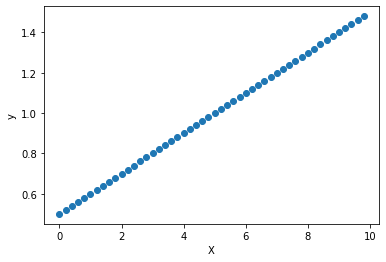

In [68]:
# Plot generated X,y data
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y");

#### Split data into training and test sets

In [69]:
# Split data into training and test sets

train_split = int(0.8*len(X)) #Create 80/20 split for train/test

# Create 80/20 split
train_split = int(0.8*len(X))

# Subset train and test data
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test =  X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [70]:
# Visualize X_train, y_train

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  # Plot training data
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data
  plt.scatter(test_data, test_labels, c="g", s=4, label="Test data")

  #Plot predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="predictions")

  #Show legend
  plt.legend();

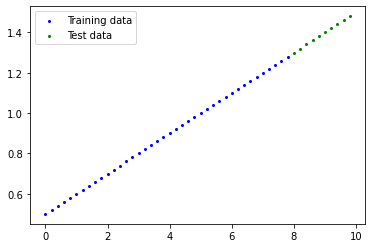

In [71]:
plot_predictions();

### 6.2 Building a PyTorch Linear Model

In [72]:
# Create linear model by subclassing nn.Modue
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating model parameters - Applies a linear transformation to the incoming data
    # Also called lienar transform, dense layer, fully connected layer, probing layer
    self.linear_layer = nn.Linear(in_features=1, # 1 input feat = X
                                  out_features=1) # 1 output feat = y

  # Define the forward() method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [73]:

X_train[:5], y_train[:5]

(tensor([[0.0000],
         [0.2000],
         [0.4000],
         [0.6000],
         [0.8000]]), tensor([[0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800]]))

In [74]:
# Test untrained model predictions

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[6.9463],
        [7.0992],
        [7.2521],
        [7.4050],
        [7.5579],
        [7.7109],
        [7.8638],
        [8.0167],
        [8.1696],
        [8.3225]])

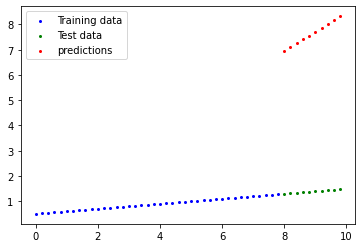

In [75]:
plot_predictions(predictions=y_preds);

### 6.3 Train Linear Model

In [76]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer - use gradient descent for linear model
optimizer = torch.optim.SGD(model_1.parameters(),
                         lr = 0.01)

In [77]:
loss_fn

L1Loss()

#### Build training and testing loops

In [78]:
# Set manual seed
torch.manual_seed(42)

# Track model progress
epoch_count = []
train_loss_values = []
test_loss_values = []

# Pass data through set num of epochs
epochs = 200

for epoch in range(epochs):

  ### TRAINING
  # Turn model to training mode
  model_1.train()

  # 1. Forward pass on train data
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Reset optimizer each epoch using zero_grad
  optimizer.zero_grad()

  # 4. Perform backpropgation on the loss
  loss.backward()

  # 5. Step optimizer (gradient descent)
  optimizer.step()

  ###TESTING
  # Turn model to eval mode
  model_1.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():

    # 1. Foward pass test data
    test_pred = model_1(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out output every 10 epochs
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

    print(model_1.state_dict())

Epoch: 0 | Train Loss: 2.921708345413208 | Test Loss: 5.887301445007324
OrderedDict([('linear_layer.weight', tensor([[0.7255]])), ('linear_layer.bias', tensor([0.8200]))])
Epoch: 10 | Train Loss: 1.3007087707519531 | Test Loss: 2.3163018226623535
OrderedDict([('linear_layer.weight', tensor([[0.3355]])), ('linear_layer.bias', tensor([0.7200]))])
Epoch: 20 | Train Loss: 0.12122870981693268 | Test Loss: 0.0644083246588707
OrderedDict([('linear_layer.weight', tensor([[0.0766]])), ('linear_layer.bias', tensor([0.6435]))])
Epoch: 30 | Train Loss: 0.07699860632419586 | Test Loss: 0.3269083499908447
OrderedDict([('linear_layer.weight', tensor([[0.0516]])), ('linear_layer.bias', tensor([0.6035]))])
Epoch: 40 | Train Loss: 0.05912858247756958 | Test Loss: 0.33627843856811523
OrderedDict([('linear_layer.weight', tensor([[0.0533]])), ('linear_layer.bias', tensor([0.5790]))])
Epoch: 50 | Train Loss: 0.030385762453079224 | Test Loss: 0.1278885304927826
OrderedDict([('linear_layer.weight', tensor([[0

### 6.4 Making Predictions

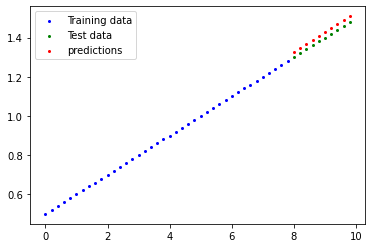

In [79]:
plot_predictions(predictions=test_pred)

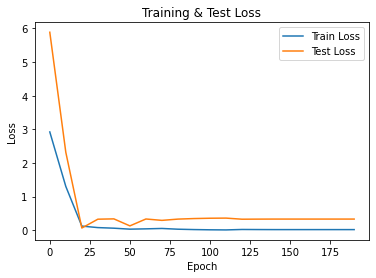

In [80]:
# Plot loss curves

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Test Loss")
plt.legend();

### 6.5 Saving and loading model 

In [81]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1019]])),
             ('linear_layer.bias', tensor([0.5095]))])

In [82]:
optimizer.state_dict()

{'state': {0: {'momentum_buffer': None}, 1: {'momentum_buffer': None}},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'params': [0, 1]}]}

In [83]:
# Save PyTorch model: model_1 
from pathlib import Path

# 1. Instantiate model directory -> in Google Colab: content/mkdir_name/model_path
# we already created a "models" directory path previously using mkdir
MODEL_PATH = Path("models")

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save model `state_dict()`
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_1.pth


In [84]:
# Load model

loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.1019]])),
             ('linear_layer.bias', tensor([0.5095]))])

In [85]:
# Make predictions with model_1
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[1.3250],
        [1.3454],
        [1.3658],
        [1.3862],
        [1.4066],
        [1.4270],
        [1.4473],
        [1.4677],
        [1.4881],
        [1.5085]])

In [86]:
# Make predictions with loaded_model_1
loaded_model_1.eval()
with torch.inference_mode():
  loaded_y_preds = loaded_model_1(X_test)

loaded_y_preds

tensor([[1.3250],
        [1.3454],
        [1.3658],
        [1.3862],
        [1.4066],
        [1.4270],
        [1.4473],
        [1.4677],
        [1.4881],
        [1.5085]])

In [87]:
# Are predictions from model_1 and loaded_model_1 identical?
y_preds == loaded_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])